In [13]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from keras.models import load_model
# from keras.utils.vis_utils import plot_model
from tf_explain.core.grad_cam import GradCAM

import datasets

In [14]:
# Check if the GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [15]:
# Load the model
model = load_model('model.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 35, 26, 512)       14714688  
                                                                 
 flatten_2 (Flatten)         (None, 465920)            0         
                                                                 
 dense (Dense)               (None, 128)               59637888  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 predictions (Dense)         (None, 9)                 1161      
                                                                 
Total params: 74353737 (283.64 MB)
Trainable params: 74353737 (283.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Print the summary of the VGG16 model
model.layers[0].summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1122, 846, 3)]    0         
                                                                 
 block1_conv1 (Conv2D)       (None, 1122, 846, 64)     1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 1122, 846, 64)     36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 561, 423, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 561, 423, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 561, 423, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 280, 211, 128)     0     

In [17]:
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
# Load validation dataset
_, validation = datasets.get_datasets()

Found 107394 files belonging to 9 classes.
Using 85916 files for training.
Using 21478 files for validation.


In [19]:
for batch_images, batch_labels in validation.take(1):
    for image, label in zip(batch_images, batch_labels):
        test_image = image.numpy()
        test_label = label.numpy().astype('uint8')
        break
        
data = ([test_image], None)

In [20]:
class_index = np.argmax(test_label)
class_index

7

## Grad-CAM

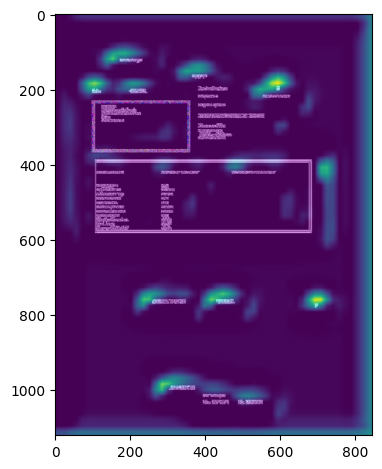

In [25]:
# Instantiation of the explainer
explainer = GradCAM()

# Call to explain() method
output = explainer.explain(
    validation_data=data,
    model=model.layers[0],  # Use only the VGG16 model
    class_index=class_index,
    layer_name='block5_conv3'
)

plt.imshow(output)
plt.tight_layout()
plt.show()

# Save output
explainer.save(output, '.', 'grad_cam.png')

In [22]:
## 